### Парсинг данных и создание датафрейма

In [152]:
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

In [153]:
def procents(d):
    l = len(d)
    res = []
    for name in set(d['name']):
        count = len(d[d['name'] == name])
        res.append((name, count, count/l*100))
    return pd.DataFrame(res, columns=['name', 'count', 'percent'])

In [154]:
def dose_weights(d):
    l = len(d)
    res = []
    total_dose = sum(d['dE'])
    for name in set(d['name']):
        particle_filt = d[d['name'] == name]
        dose = sum(particle_filt['dE'])
        res.append((name, dose, dose/total_dose*100))
    return pd.DataFrame(res, columns=['name', 'dose', 'dose_percent'])

In [155]:
def get_z_dose_bins(d, bins=100):
    borders = np.linspace(-20, 20, bins)
    bins = []
    for i in range(len(borders[:-1])):
        dd = d[d['z'] > borders[i]]
        bin_data = dd[dd['z'] < borders[i+1]]
        bins.append(sum(bin_data['dE']))
    return np.array(borders[:-1])+20, np.array(bins)

In [156]:
def get_energy_count_bins(d, bins=100):
    n, e = np.histogram(d['energy'], bins)
    return e[:-1], n

In [157]:
pnames = {'annihil':'Аннигиляция','compt':'Комптон-эффект','conv':'Рождение пар',
          'eBrem':'Тормозное излучение','eIoni':'Ионизационные потери','hadElastic':'?',
          'phot':'Фотоэффект','photonNuclear':'?'}

In [158]:
def load_data(folder = 'build'):
    paths = glob.glob(f"{folder}/*.csv")
    with open(paths[0], 'r') as f:
        print(f"Headers from file: {paths[0]}")
        hlines = []
        while True:
            line = f.readline()
            if len(line) == 0 or line[0] != '#':
                break
            hlines.append(line)
        title = hlines[1].replace('#title ', '')[:-1]
        sep = chr(int(hlines[2].replace('#separator ', '')[:-1]))
        vsc_sep = chr(int(hlines[3].replace('#vector_separator ', '')[:-1]))
        columns = [' '.join(l.split(' ')[2:])[:-1] for l in hlines[4:]]
        meta_len = len(hlines)
    data = pd.DataFrame()
    for path in paths[:10]:
        item = pd.read_csv(path, skiprows=meta_len, names=columns)
        data = pd.concat([data, item], ignore_index=True)
    return data

In [181]:
data = load_data('data_geen_water')
data2 = load_data('build')
data3 = load_data('data_geen_acrylic')

Headers from file: data_geen_water/Run0_nt_ParticleData_t8.csv
Headers from file: build/Run0_nt_ParticleData_t8.csv
Headers from file: data_geen_acrylic/Run0_nt_ParticleData_t8.csv


In [182]:
secondary = data[data['creator_process'] != 'user']
secondary2 = data2[data2['creator_process'] != 'user']
secondary3 = data3[data3['creator_process'] != 'user']
print(sum(secondary2['dE'])/sum(secondary['dE']))
print(sum(secondary3['dE'])/sum(secondary['dE']))

1.100247183353266
1.100247183353266


In [183]:
print(sum(data2['dE'])/sum(data['dE']))
print(sum(data3['dE'])/sum(data['dE']))

1.0930617885061027
1.0930617885061027


## "Первичные" ускорительные частицы

In [160]:
primary = data[data['creator_process'] == 'user']
print(len(primary))
# procents(primary)

2191980


In [161]:
primary2 = data2[data2['creator_process'] == 'user']
print(len(primary2))

2255847


In [129]:
# print('Суммарная доза от первичных частиц:', sum(dose_weights(primary)['dose']))
# dose_weights(primary)

## Вторичные частицы в фантоме

In [162]:
secondary = data[data['creator_process'] != 'user']
print('Количество вторичных частиц', len(secondary))
print('Суммарная доза от вторичных частиц:', sum(dose_weights(secondary)['dose']))
dose_weights(secondary)

Количество вторичных частиц 8733948
Суммарная доза от вторичных частиц: 425132.0795659667


,name,dose,dose_percent
0,O17,0.000041,9.735233e-09
1,O16,39.639670,9.324083e-03
2,O15,0.077820,1.830481e-05
3,O18,0.158966,3.739217e-05
4,e+,18787.019613,4.419102e+00
5,deuteron,0.203293,4.781876e-05
6,N15,0.929196,2.185664e-04
7,C12,15.069317,3.544620e-03
8,proton,981.400105,2.308459e-01
9,alpha,44.402987,1.044452e-02


In [163]:
secondary2 = data2[data2['creator_process'] != 'user']
print('Количество вторичных частиц', len(secondary2))
print('Суммарная доза от вторичных частиц:', sum(dose_weights(secondary2)['dose']))
dose_weights(secondary2)

Количество вторичных частиц 8525180
Суммарная доза от вторичных частиц: 414986.55525440513


,name,dose,dose_percent
0,e+,14336.500280,3.454690
1,deuteron,0.287171,0.000069
2,C12,40.271241,0.009704
3,proton,956.953081,0.230599
4,C13,0.438208,0.000106
5,alpha,74.589881,0.017974
6,e-,399560.091293,96.282659
7,gamma,17.424100,0.004199


## Доза от глубины

**Доза от первичных и вторичных частиц**

In [178]:
# borders1, bins1 = get_z_dose_bins(data)
# borders2, bins2 = get_z_dose_bins(primary)
borders3, bins3 = get_z_dose_bins(secondary)
borders4, bins4 = get_z_dose_bins(secondary2)
borders5, bins5 = get_z_dose_bins(secondary3)

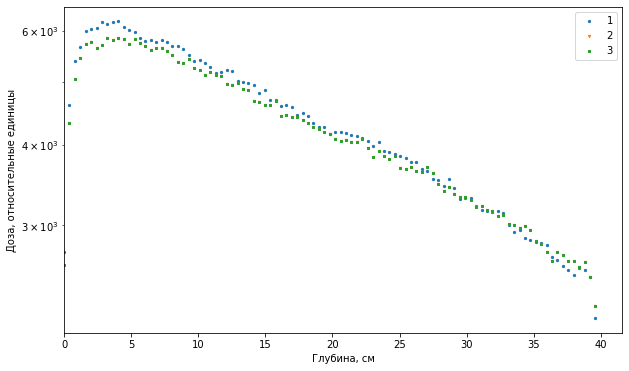

In [180]:
# plt.scatter(borders1, bins1, s=5, label='total')
# plt.scatter(borders2, bins2, s=5, label='primary')
plt.scatter(borders3, bins3, s=5, marker='o', label='1')
plt.scatter(borders4, bins4, s=5, marker='v', label='2')
plt.scatter(borders4, bins4, s=5, marker='s', label='3')
plt.xlim([0, plt.xlim()[1]])
# plt.ylim([0, plt.ylim()[1]])
plt.yscale('log')
plt.ylabel('Доза, относительные единицы')
plt.xlabel('Глубина, см')
plt.legend()
plt.show()

**Доза от первичных частиц**

In [113]:
borders1, bins1 = get_z_dose_bins(primary[primary['name'] == 'e-'])
borders2, bins2 = get_z_dose_bins(primary[primary['name'] == 'gamma'])

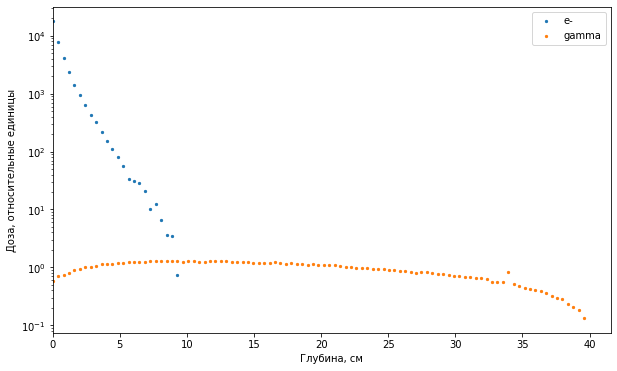

In [114]:
plt.scatter(borders1, bins1, s=5, label='e-')
plt.scatter(borders2, bins2, s=5, label='gamma')
plt.xlim([0, plt.xlim()[1]])
# plt.ylim([0, plt.ylim()[1]])
plt.yscale('log')
plt.ylabel('Доза, относительные единицы')
plt.xlabel('Глубина, см')
plt.legend()
plt.show()

**Доза от вторичных частиц**

In [166]:
secondary = data[data['creator_process'] != 'user']
secondary2 = data2[data2['creator_process'] != 'user']
sum(secondary2['dE'])/sum(secondary['dE'])

0.9761355945638408

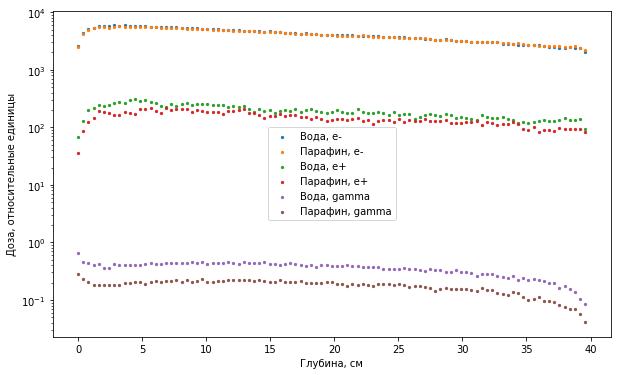

In [168]:
for name in ['e-','e+', 'gamma']:
    borders, bins = get_z_dose_bins(secondary[secondary['name'] == name])
    plt.scatter(borders, bins, s=5, label='Вода, ' + name)
    borders, bins = get_z_dose_bins(secondary2[secondary2['name'] == name])
    plt.scatter(borders, bins, s=5, label='Парафин, '+name)
    
plt.yscale('log')
plt.ylabel('Доза, относительные единицы')
plt.xlabel('Глубина, см')
plt.legend()
plt.show()

## Распределение по энергиям

**Энергия по вторичным частицам**

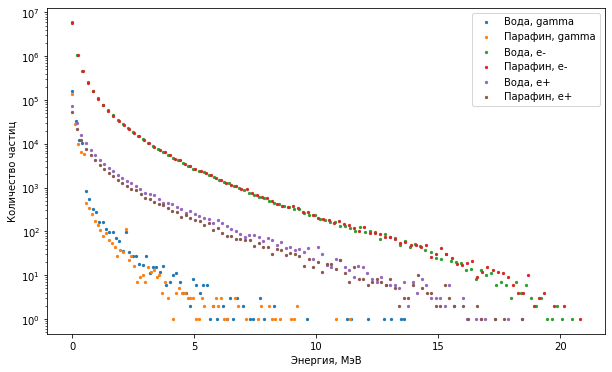

In [169]:
for pname in ['gamma', 'e-', 'e+']:
    names_particle = secondary[secondary['name'] == pname]
    energys, counts = get_energy_count_bins(names_particle)
    plt.scatter(energys, counts, s=5, label='Вода, ' + pname)
    
    names_particle = secondary2[secondary2['name'] == pname]
    energys, counts = get_energy_count_bins(names_particle)
    plt.scatter(energys, counts, s=5, label='Парафин, ' + pname)

plt.legend()
# plt.ylim([10, 10**8])
plt.yscale('log')
plt.ylabel('Количество частиц')
plt.xlabel('Энергия, МэВ')
plt.show()

**Энергия вторичной частицы по процессу рождения**

In [89]:
def energy_by_process(paticles):
    for process in pnames.keys():
        names_process = paticles[paticles['creator_process'] == process]
        if len(names_process) == 0:
            continue
        energys, counts = get_energy_count_bins(names_process)
        plt.scatter(energys, counts, s=5, label=pnames[process])

    plt.legend()
    # plt.ylim([10, 10**8])
    plt.yscale('log')
    plt.ylabel('Количество частиц')
    plt.xlabel('Энергия, МэВ')
    plt.show()

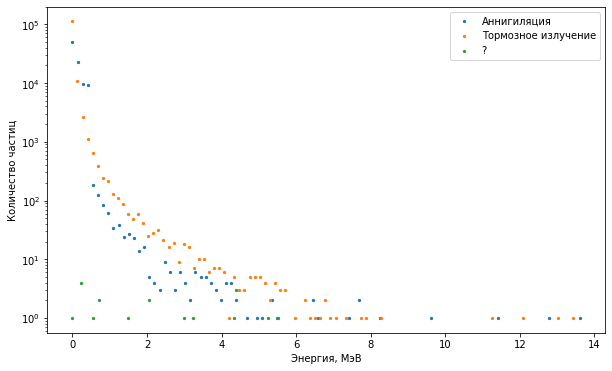

In [90]:
paticles = secondary[secondary['name'] == 'gamma']
energy_by_process(paticles)

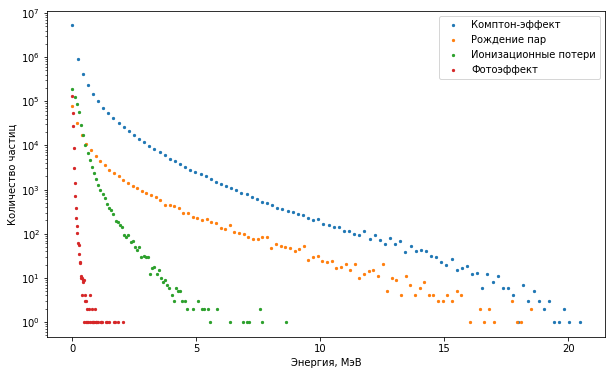

In [92]:
paticles = secondary[secondary['name'] == 'e-']
energy_by_process(paticles)

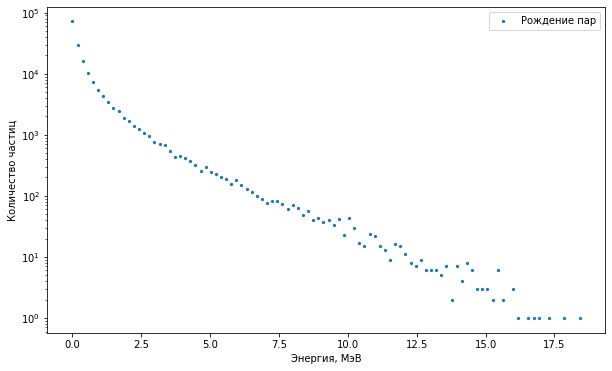

In [93]:
paticles = secondary[secondary['name'] == 'e+']
energy_by_process(paticles)